In [1]:
import pyulog
import pandas
import px4tools
import px4tools.ulog
import bokeh
import bokeh.io
import bokeh.plotting as bplt
import matplotlib.pyplot as plt
import numpy as np
bokeh.io.output_notebook()
%matplotlib inline

Loading BokehJS ...

# Reading a Ulog File

In [2]:
data = px4tools.ulog.ulog2pandas('./ulog/18_15_02.ulg')

In [3]:
for key in data.keys():
    print(key)

actuator_controls_0_0_control_0_
actuator_controls_0_0_control_1_
actuator_controls_0_0_control_2_
actuator_controls_0_0_control_3_
actuator_controls_0_0_control_4_
actuator_controls_0_0_control_5_
actuator_controls_0_0_control_6_
actuator_controls_0_0_control_7_
actuator_controls_0_0_timestamp_sample
actuator_outputs_0_noutputs
actuator_outputs_0_output_0_
actuator_outputs_0_output_10_
actuator_outputs_0_output_11_
actuator_outputs_0_output_12_
actuator_outputs_0_output_13_
actuator_outputs_0_output_14_
actuator_outputs_0_output_15_
actuator_outputs_0_output_1_
actuator_outputs_0_output_2_
actuator_outputs_0_output_3_
actuator_outputs_0_output_4_
actuator_outputs_0_output_5_
actuator_outputs_0_output_6_
actuator_outputs_0_output_7_
actuator_outputs_0_output_8_
actuator_outputs_0_output_9_
battery_status_0_cell_count
battery_status_0_connected
battery_status_0_current_a
battery_status_0_current_filtered_a
battery_status_0_discharged_mah
battery_status_0_remaining
battery_status_0_volta

# Matplotlib Plotting with Pandas

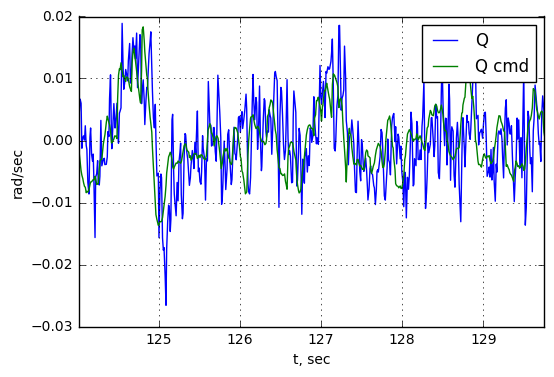

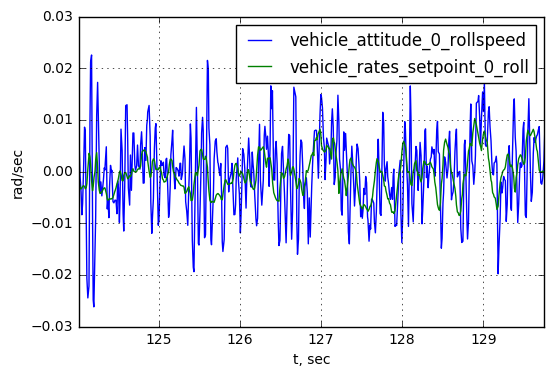

In [4]:
d1 = px4tools.ulog.time_range(data, 124, 130)

plt.figure()
d1.vehicle_attitude_0_pitchspeed.plot(label='Q')
d1.vehicle_rates_setpoint_0_pitch.plot(label='Q cmd')
plt.grid()
plt.xlabel('t, sec')
plt.ylabel('rad/sec')
plt.legend()

plt.figure()
d1.vehicle_attitude_0_rollspeed.plot()
d1.vehicle_rates_setpoint_0_roll.plot()
plt.grid()
plt.xlabel('t, sec')
plt.ylabel('rad/sec')
plt.legend()

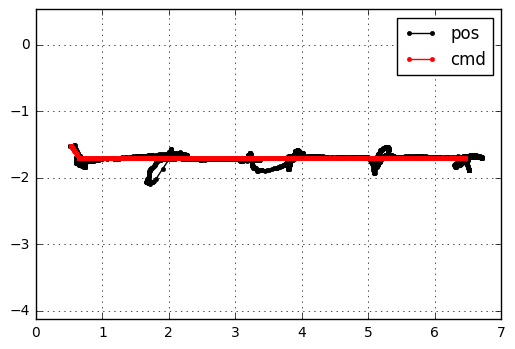

In [5]:
d1 = px4tools.ulog.time_range(data, 100, 600)
plt.plot(d1.vehicle_local_position_0_y, d1.vehicle_local_position_0_x, 'k.-', label='pos')
plt.plot(d1.vehicle_local_position_setpoint_0_y, d1.vehicle_local_position_setpoint_0_x, 'r.-', label='cmd')
plt.legend()
plt.axis('equal')
plt.grid()

# Bokeh Interactive Plotting

In [6]:
f = bplt.figure()
f.scatter(d1.vehicle_local_position_0_y, d1.vehicle_local_position_0_x, legend='est position')
f.scatter(d1.vehicle_local_position_setpoint_0_y, d1.vehicle_local_position_setpoint_0_x, legend='cmd', color='red')
f.scatter(d1.vehicle_local_position_setpoint_0_y, d1.vision_position_estimate_0_x, d1.vision_position_estimate_0_y, legend='cmd', color='green')
bplt.show(f)